# Notebook Config

In [4]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
from fastai.vision import *
from fastai.metrics import error_rate

## Variables

In [6]:
bs = 16
size = (480,640)

In [7]:
path = "../../Dataset/classifier-data/"
save_path = "saved-models/"

## Custom Functions

In [8]:
import shutil, os
def learn_save_copy(learn, name, export):
    if export:
        learn.export()
        path = "../../Dataset/classifier-data/" + "export.pkl"
    else:
        path = learn.save(name, return_path=True)
    print("Copying from: " + str(path) + "\nCopying to: " + save_path)
    shutil.copy(path, save_path)
    os.remove(path)

# Data Ingestion

In [9]:
np.random.seed(42)

In [10]:
#tfms = get_transforms(do_flip=False)

In [11]:
data = (ImageList.from_folder(path)
        .split_by_rand_pct(0.2)
        .label_from_folder()
        .transform(size=size)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['audience',
  'audience_presenter',
  'audience_presenter_slide',
  'presenter',
  'presenter_slide',
  'presenter_whiteboard',
  'slide'],
 7,
 1211,
 302)

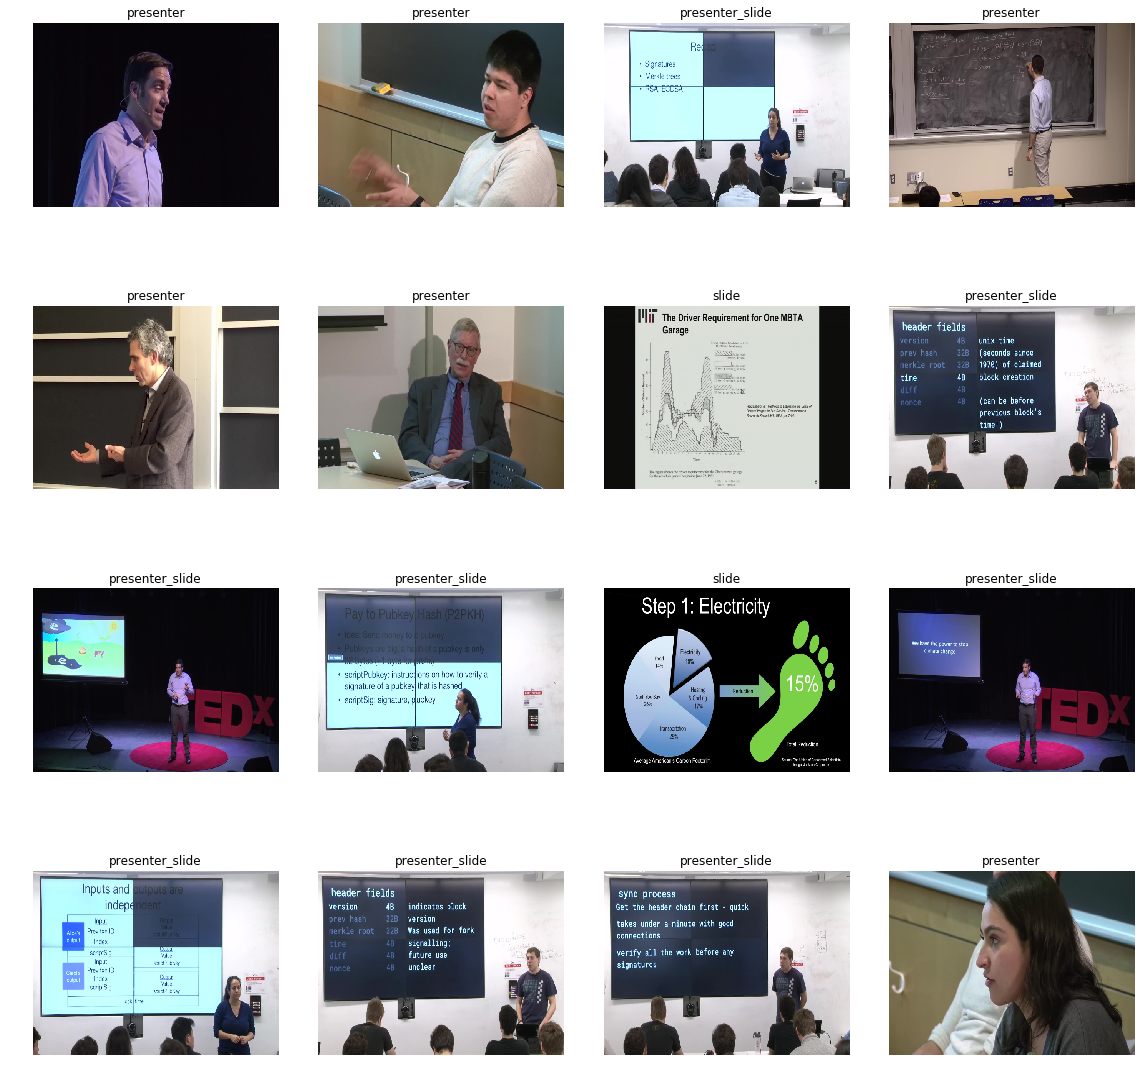

In [10]:
data.show_batch(6)

# Training

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


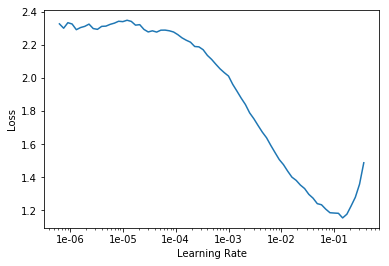

In [14]:
learn.recorder.plot()

In [15]:
learn.fit_one_cycle(4, 4e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.490148,0.116444,0.033113,00:53
1,0.266457,0.159699,0.046358,00:56
2,0.154105,0.069853,0.023179,00:57
3,0.076480,0.079136,0.023179,00:54


In [16]:
interp = ClassificationInterpretation.from_learner(learn)

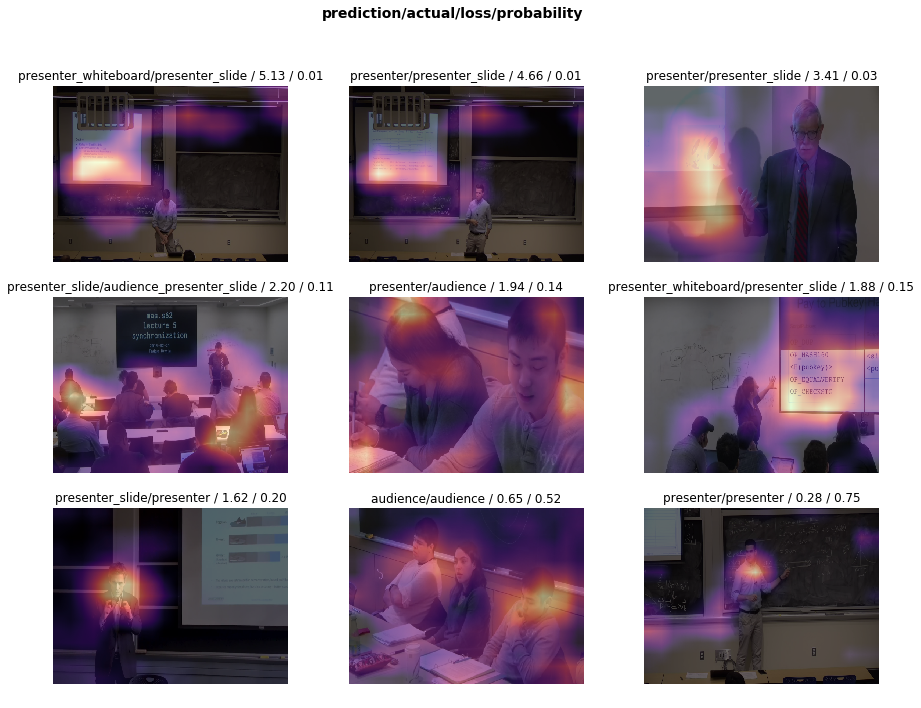

In [17]:
interp.plot_top_losses(9, figsize=(15,11))

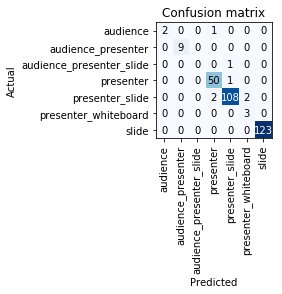

In [18]:
interp.plot_confusion_matrix()

In [19]:
interp.most_confused() #min_val=2

[('presenter_slide', 'presenter', 2),
 ('presenter_slide', 'presenter_whiteboard', 2),
 ('audience', 'presenter', 1),
 ('audience_presenter_slide', 'presenter_slide', 1),
 ('presenter', 'presenter_slide', 1)]

In [20]:
learn_save_copy(learn, "7-vid", False)

Copying from: ../../Dataset/classifier-data/models/7-vid.pth
Copying to: saved-models/


In [21]:
learn_save_copy(learn, "7-vid", True)

Copying from: ../../Dataset/classifier-data/export.pkl
Copying to: saved-models/
